In [18]:
import pandas as pd
import plotly.express as px

In [19]:
# Load dataset
file_path = "LACrimeData9999.csv"
df = pd.read_csv(file_path)

# Convert LAT/LON to numeric & remove missing values
df["LAT"] = pd.to_numeric(df["LAT"], errors="coerce")
df["LON"] = pd.to_numeric(df["LON"], errors="coerce")
df = df.dropna(subset=["LAT", "LON"])

In [20]:
# Define crime type groupings
crime_mapping = {
    "THEFT": ["THEFT PLAIN - PETTY ($950 & UNDER)", "THEFT OF IDENTITY", "BURGLARY FROM VEHICLE", 
              "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)", "SHOPLIFTING - PETTY THEFT ($950 & UNDER)"],
    "ASSAULT": ["BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    "VANDALISM": ["VANDALISM - MISDEMEANOR ($399 OR UNDER)", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"],
    "SEX CRIMES": ["LEWD CONDUCT", "SEXUAL PENETRATION W/FOREIGN OBJECT", "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS"],
    "OTHER": ["LETTERS, LEWD - TELEPHONE CALLS, LEWD", "KIDNAPPING", "CRIMINAL HOMICIDE"]
}

# Assign categories
def categorize_crime(crime_desc):
    for category, crimes in crime_mapping.items():
        if crime_desc in crimes:
            return category
    return "OTHER"

df["Crime Category"] = df["Crm Cd Desc"].apply(categorize_crime)

In [21]:
# Create interactive scatter map
fig = px.scatter_mapbox(
    df,
    lat="LAT",
    lon="LON",
    color="Crime Category",
    hover_data=["Crm Cd Desc"],
    zoom=10,
    mapbox_style="open-street-map"
)

# Set title and display figure
fig.update_layout(title="Crime Locations in Los Angeles (Interactive)")
fig.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load dataset
file_path = "LACrimeData9999.csv"
df = pd.read_csv(file_path)

# Convert gender codes into readable format
gender_mapping = {
    "M": "Male",
    "F": "Female",
    "X": "Non-Binary/Other",
    "H": "Unknown"
}
df["Vict Sex"] = df["Vict Sex"].map(gender_mapping)

# Convert ethnicity codes into readable format (Based on LAPD Codes)
ethnicity_mapping = {
    "W": "White",
    "B": "Black",
    "H": "Hispanic",
    "A": "Asian",
    "O": "Other",
    "X": "Unknown"
}
df["Vict Descent"] = df["Vict Descent"].map(ethnicity_mapping)

# Drop rows with missing values in essential columns
df = df.dropna(subset=["Vict Sex", "Vict Descent", "Crm Cd Desc"])

In [24]:
# Define crime type groupings
crime_mapping = {
    "THEFT": ["THEFT PLAIN - PETTY ($950 & UNDER)", "THEFT OF IDENTITY", "BURGLARY FROM VEHICLE", 
              "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)", "SHOPLIFTING - PETTY THEFT ($950 & UNDER)"],
    "ASSAULT": ["BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    "VANDALISM": ["VANDALISM - MISDEMEANOR ($399 OR UNDER)", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"],
    "SEX CRIMES": ["LEWD CONDUCT", "SEXUAL PENETRATION W/FOREIGN OBJECT", "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS"],
    "OTHER": ["LETTERS, LEWD - TELEPHONE CALLS, LEWD", "KIDNAPPING", "CRIMINAL HOMICIDE"]
}

# Assign categories
def categorize_crime(crime_desc):
    for category, crimes in crime_mapping.items():
        if crime_desc in crimes:
            return category
    return "OTHER"

df["Crime Category"] = df["Crm Cd Desc"].apply(categorize_crime)

/var/folders/r4/9v4rm46n39jdzp0vs3mwdk_c0000gp/T/ipykernel_40435/22574809.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




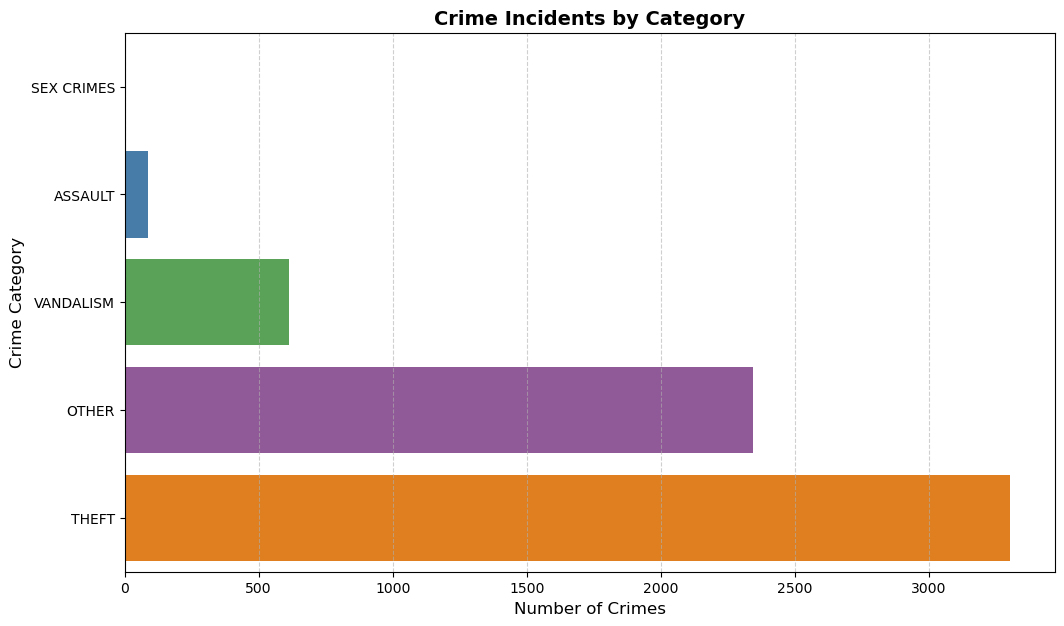

In [25]:
# Set figure size
plt.figure(figsize=(12, 7))

# Count occurrences of each crime category
crime_counts = df["Crime Category"].value_counts().sort_values()

# Use a distinct categorical color palette (Set1, Set2, Paired, or Pastel)
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="Set1")  # Change palette here if needed

# Labels & Title
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime Category", fontsize=12)
plt.title("Crime Incidents by Category", fontsize=14, fontweight="bold")

# Improve layout
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
# Load dataset
file_path = "LACrimeData9999.csv"
df = pd.read_csv(file_path)

# Convert gender codes into readable format
gender_mapping = {
    "M": "Male",
    "F": "Female",
    "X": "Non-Binary/Other",
    "H": "Unknown"
}
df["Vict Sex"] = df["Vict Sex"].map(gender_mapping)

# Drop rows with missing values in essential columns
df = df.dropna(subset=["Vict Age", "Vict Sex", "Crm Cd Desc"])

# Convert victim age to numeric
df["Vict Age"] = pd.to_numeric(df["Vict Age"], errors="coerce")
df = df[df["Vict Age"] > 0]  # Remove invalid ages


In [35]:
# Define crime type groupings
crime_mapping = {
    "THEFT": ["THEFT PLAIN - PETTY ($950 & UNDER)", "THEFT OF IDENTITY", "BURGLARY FROM VEHICLE", 
              "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)", "SHOPLIFTING - PETTY THEFT ($950 & UNDER)"],
    "ASSAULT": ["BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"],
    "VANDALISM": ["VANDALISM - MISDEMEANOR ($399 OR UNDER)", "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"],
    "SEX CRIMES": ["LEWD CONDUCT", "SEXUAL PENETRATION W/FOREIGN OBJECT", "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS"],
    "OTHER": ["LETTERS, LEWD - TELEPHONE CALLS, LEWD", "KIDNAPPING", "CRIMINAL HOMICIDE"]
}

# Assign categories
def categorize_crime(crime_desc):
    for category, crimes in crime_mapping.items():
        if crime_desc in crimes:
            return category
    return "OTHER"

df["Crime Category"] = df["Crm Cd Desc"].apply(categorize_crime)

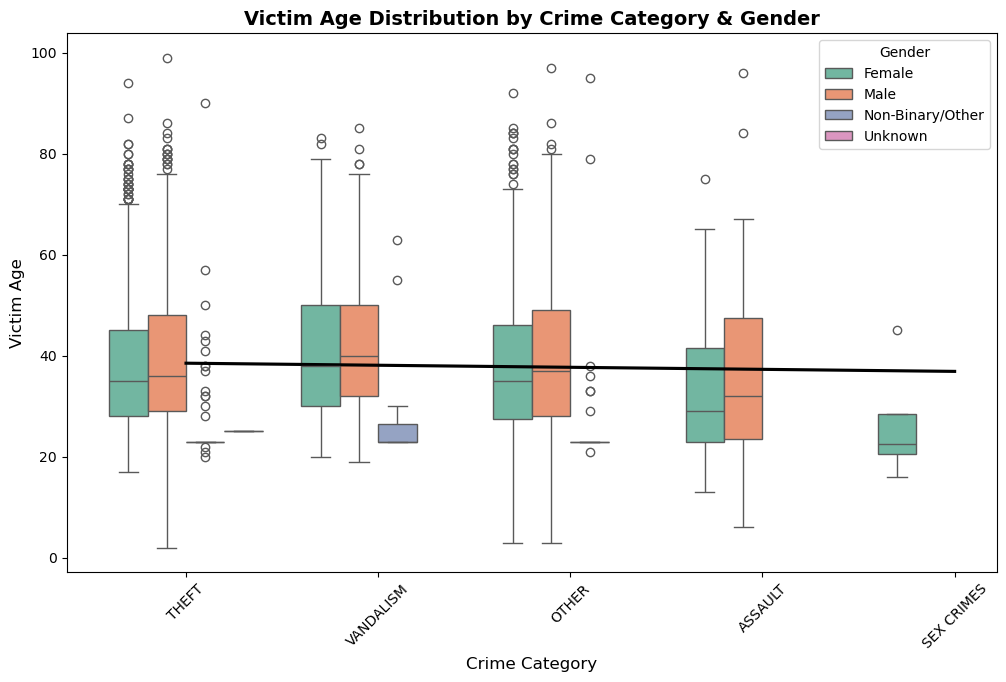

In [38]:
# Set figure size
plt.figure(figsize=(12, 7))

# Create boxplots split by gender
sns.boxplot(data=df, x="Crime Category", y="Vict Age", hue="Vict Sex", palette="Set2")

# Add regression line (trendline)
sns.regplot(data=df, x=pd.factorize(df["Crime Category"])[0], y="Vict Age", scatter=False, color="black", ci=None)

# Labels & Title
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Victim Age", fontsize=12)
plt.title("Victim Age Distribution by Crime Category & Gender", fontsize=14, fontweight="bold")

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.legend(title="Gender")

plt.savefig('boxplot.png')

plt.show()

In [37]:
plt.savefig('boxplot1.png')

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import altair as alt

# Reload and clean dataset
df = pd.read_csv("LACrimeData9999.csv")
df = df[(df['Vict Age'] > 0) & (df['Vict Age'] < 120)]
df = df.dropna(subset=['Crm Cd Desc'])

# Create age groups
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['0–17', '18–24', '25–34', '35–49', '50–64', '65+']
df['Age Group'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels)

# Get top 5 crime types
top_crimes = df['Crm Cd Desc'].value_counts().nlargest(5).index.tolist()
df_top = df[df['Crm Cd Desc'].isin(top_crimes)]

# Group by crime and age group
agg_df = df_top.groupby(['Crm Cd Desc', 'Age Group']).size().reset_index(name='Count')

# Altair bar chart
chart = alt.Chart(agg_df).mark_bar().encode(
    x=alt.X('Age Group:N', title='Victim Age Group'),
    y=alt.Y('Count:Q', title='Number of Crimes'),
    color=alt.Color('Crm Cd Desc:N', title='Crime Type'),
    tooltip=['Crm Cd Desc', 'Age Group', 'Count']
).properties(
    width=700,
    height=400,
    title='Top 5 Crime Types by Victim Age Group'
).interactive()


chart.show()

/var/folders/r4/9v4rm46n39jdzp0vs3mwdk_c0000gp/T/ipykernel_40435/3662847621.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



alt.Chart(...)

In [31]:
gender_counts = df['Vict Sex'].value_counts().to_dict()
gender_counts

{'M': 2516, 'F': 2076, 'X': 216, 'H': 1}

/opt/miniconda3/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



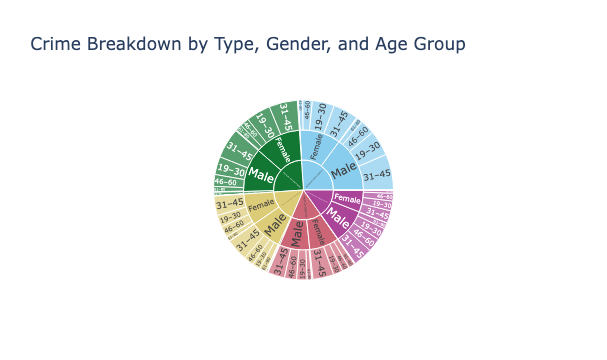

In [39]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("LACrimeData9999.csv")

# Clean relevant data
df = df[(df['Vict Age'] > 0) & (df['Vict Age'] < 100)]
df = df[df['Crm Cd Desc'].notna() & df['Vict Sex'].notna()]

# Simplify gender labels
gender_map = {'M': 'Male', 'F': 'Female', 'X': 'Non-Binary/Other', 'H': 'Non-Binary/Other'}
df['Gender'] = df['Vict Sex'].map(gender_map)

# Create age groups
bins = [0, 18, 30, 45, 60, 80, 100]
labels = ['0–18', '19–30', '31–45', '46–60', '61–80', '81–100']
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

# Top 5 crimes only
top_crimes = df['Crm Cd Desc'].value_counts().nlargest(5).index
df_top = df[df['Crm Cd Desc'].isin(top_crimes)].copy()

# Create sunburst chart
fig = px.sunburst(
    df_top,
    path=['Crm Cd Desc', 'Gender', 'Age Group'],
    values=None,
    color='Crm Cd Desc',
    color_discrete_sequence=px.colors.qualitative.Safe,
    title='Crime Breakdown by Type, Gender, and Age Group'
)

fig.update_traces(insidetextorientation='radial')

fig.write_html("sunburst.html", include_plotlyjs="cdn")

fig.show()